In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y=pd.read_csv('AAPL_quarterly_financials.csv')

In [3]:
y.index=y.name

In [4]:
y=pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]

In [5]:
y.index=pd.to_datetime(y.index)

In [6]:
# ASSUMPTION NULLS ARE OS. NEED TO INVESTIGATE

In [7]:
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [8]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [9]:
from pytrends.request import TrendReq

In [10]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Steve Jobs", "iOS Updates", "Apple Keyboards", "Steve Jobs", "Apple Chinese Manufacturing", 
            "Economic Downturn", "Chip Costs", "Flat Earth", "Taylor Swift Tickets", "Super Bowl"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [11]:
X=df.resample("Q").mean()

In [12]:
# Align Data
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [13]:
X

,Steve Jobs,iOS Updates,Apple Keyboards,Apple Chinese Manufacturing,Economic Downturn,Chip Costs,Flat Earth,Taylor Swift Tickets,Super Bowl
2004-03-31,1.000000,0.000000,38.666667,0.000000,10.000000,11.666667,18.333333,0.000000,38.666667
2004-06-30,1.000000,1.666667,77.000000,31.000000,6.666667,27.000000,16.666667,0.000000,1.333333
2004-09-30,1.000000,0.000000,24.333333,32.666667,11.666667,10.333333,15.000000,0.000000,1.666667
2004-12-31,1.000000,0.000000,34.666667,33.333333,10.666667,33.333333,18.000000,0.000000,3.000000
2005-03-31,1.000000,2.666667,74.333333,0.000000,8.333333,15.333333,15.000000,0.000000,14.333333
...,...,...,...,...,...,...,...,...,...
2022-09-30,1.333333,19.000000,26.666667,4.000000,12.000000,8.333333,24.333333,1.000000,3.000000
2022-12-31,1.333333,15.000000,26.000000,0.000000,15.333333,14.333333,23.000000,37.333333,4.333333
2023-03-31,1.666667,12.333333,25.666667,3.333333,16.000000,12.333333,26.000000,14.333333,42.333333
2023-06-30,1.000000,12.666667,22.333333,2.333333,13.333333,12.000000,26.000000,56.000000,2.000000


# 2.) Normalize all the X data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_scaled=scaler.fit_transform(X)

# 3.) Run a Lasso with lambda that reduces less than half your variables. Plota a bar chart

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso=Lasso(alpha=.1)

In [19]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [31]:
coefficients=[-1,2,3,5,0,0,2,4,-1,0,0]

ConversionError: Failed to convert value(s) to axis units: Index(['Steve Jobs', 'iOS Updates', 'Apple Keyboards',
       'Apple Chinese Manufacturing', 'Economic Downturn', 'Chip Costs',
       'Flat Earth', 'Taylor Swift Tickets', 'Super Bowl'],
      dtype='object')

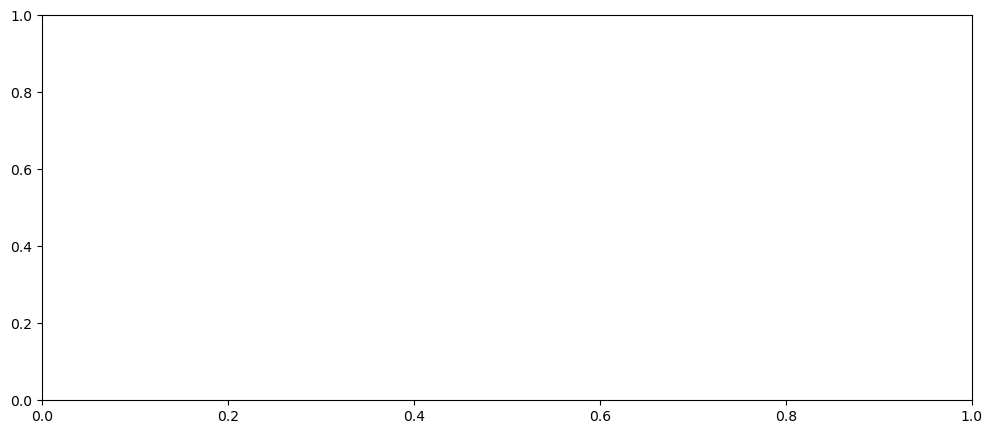

In [35]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients, X.columns)
plt.axhline(0., color = "red")
plt.show()

# 4.) Do these coefficient magnitudes make sense?

In [ ]:
# Up to Question 4

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?